In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'codetable.txt',
 'EDA.ipynb',
 'read_SouthGermanCredit.R',
 'SouthGermanCredit.asc']

In [17]:
header_names_German_to_English = {
                                    "laufkont" : "status",
                                    "laufzeit" : "duration",
                                    "moral" : "credit_history",
                                    "verw" : "purpose",
                                    "hoehe" : "amount" , 
                                    "sparkont" : "savings",
                                    "beszeit" : "employment_duration",
                                    "rate" : "installment_rate",
                                    "famges" : "personal_status_sex",
                                    "buerge" : "other_debtors",
                                    "wohnzeit" : "present_residence",
                                    "verm" : "property",
                                    "alter" : "age",
                                    "weitkred" : "other_installment_plans",
                                    "wohn" : "housing",
                                    "bishkred" : "number_credits",
                                    "beruf" : "job",
                                    "pers" : "people_liable",
                                    "telef" : "telephone",
                                    "gastarb" : "foreign_worker",
                                    "kredit" : "credit_risk"
                                }

# import json
# json_obj = json.dumps(header_names_German_to_English, indent=4)

# with open("header_names_German_to_English.json", "w") as outfile:
#     json.dump(json_obj, outfile)
# outfile.close

In [18]:
data_dir = str(os.getcwd())
data_dir = data_dir + "\SouthGermanCredit.asc"
data_dir

'C:\\Users\\Lenovo\\Desktop\\iNeuron\\ML Project - SouthGermanCredit\\Data\\SouthGermanCredit.asc'

In [12]:
try:
    data = pd.read_csv("SouthGermanCredit.asc",sep=" ")
    data.head()
except:
    data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\iNeuron\\ML Project - SouthGermanCredit\\Data\\SouthGermanCredit.asc",sep=" ")
    data.head()

In [28]:
data = data.rename(columns=header_names_German_to_English)

In [29]:
data.shape

(1000, 21)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status_sex,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


In [39]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]

In [40]:
X.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')

In [41]:
Y.columns

Index(['credit_risk'], dtype='object')

In [44]:
data.corr()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
status,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.127737,...,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,0.014145,0.066296,0.035187,0.350847
duration,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,-0.024490,...,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,0.023834,0.164718,0.134680,-0.214927
credit_history,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.040676,...,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,-0.011550,0.052370,-0.028554,0.228785
purpose,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,-0.017607,...,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,0.032577,0.078371,0.113244,-0.017979
amount,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,-0.027831,...,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,-0.017144,0.277000,0.030662,-0.154740
savings,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,-0.105069,...,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,-0.027514,0.087208,-0.010450,0.178943
employment_duration,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,-0.008116,...,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,-0.097192,0.060518,0.022845,0.116002
installment_rate,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,-0.011398,...,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,0.071207,0.014413,0.094762,-0.072404
personal_status_sex,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,0.050634,...,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,-0.122165,0.027275,-0.073103,0.088184
other_debtors,-0.127737,-0.024490,-0.040676,-0.017607,-0.027831,-0.105069,-0.008116,-0.011398,0.050634,1.000000,...,-0.155450,-0.029826,-0.038235,-0.065449,-0.025447,-0.057963,-0.020400,-0.075035,-0.140190,0.025137


<AxesSubplot:>

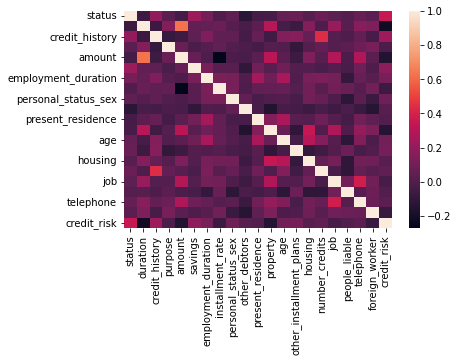

In [49]:
sns.heatmap(data.corr())